#### Image Classification using Tensorflow

In [1]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Defining the path for the data library
import pathlib
data_dir = "/Users/anshirsa/OneDrive - Capgemini/Documents/IBM Machine Learning/Animal Images"
data_dir = pathlib.Path(data_dir)

In [3]:
# Determining the image counts for all the images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2458


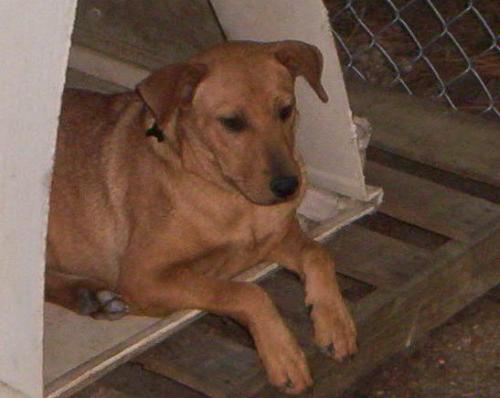

In [4]:
# Defining dogs images directory
dogs = list(data_dir.glob('dogs/*'))
PIL.Image.open(str(dogs[0]))

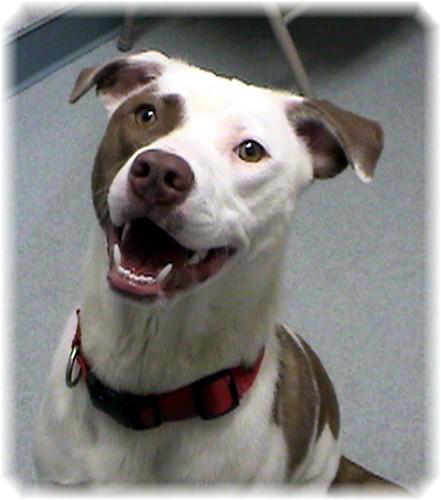

In [5]:
PIL.Image.open(str(dogs[1]))

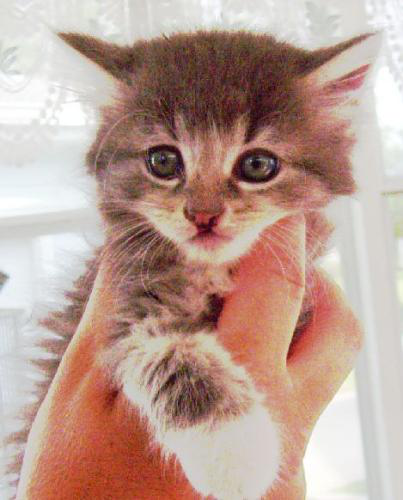

In [6]:
# Defining cats images directory
cats = list(data_dir.glob('cats/*'))
PIL.Image.open(str(cats[0]))

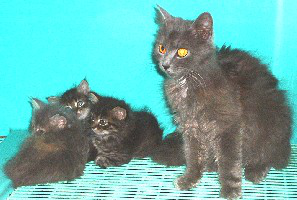

In [7]:
PIL.Image.open(str(cats[1]))

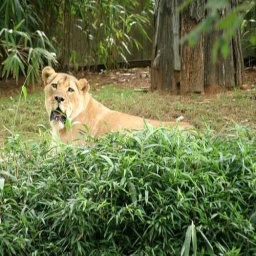

In [8]:
# Defining lions images directory
lions = list(data_dir.glob('lions/*'))
PIL.Image.open(str(lions[0]))

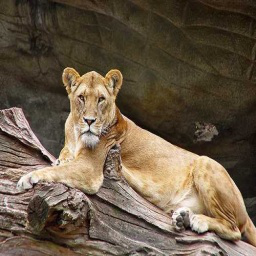

In [9]:
PIL.Image.open(str(lions[1]))

In [10]:
# Defining some parameters for the loaders
batch_size = 32
img_height = 180
img_width = 180

In [11]:
# Splitting the dataset into training data set
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2498 files belonging to 3 classes.
Using 1999 files for training.


In [12]:
# Splitting the dataset into testing dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2498 files belonging to 3 classes.
Using 499 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['Cats', 'Dogs', 'Lions']


## Visualizing the Dataset

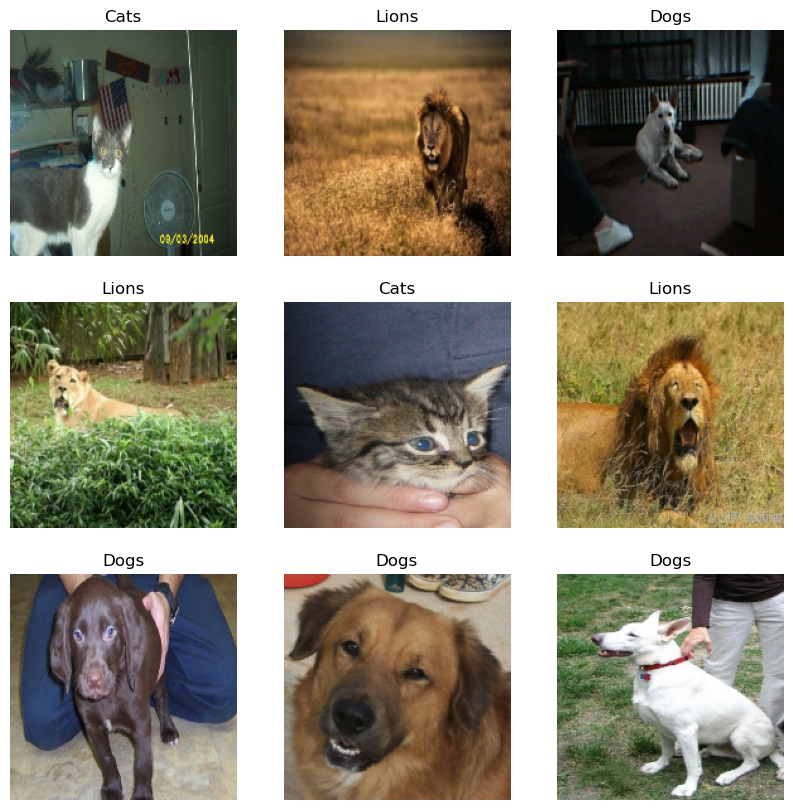

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [20]:
# Manually iterating and retrieving batches of images
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [21]:
# Configuring the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [22]:
# Standardizing the data
normalization_layer = layers.Rescaling(1./255)

In [23]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0 0.94101316


In [24]:
# Creating the model
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [25]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [27]:
# Training the model
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
63/63 [==============================] - 25s 385ms/step - loss: 0.9899 - accuracy: 0.4972 - val_loss: 0.9279 - val_accuracy: 0.5331
Epoch 2/10
63/63 [==============================] - 25s 391ms/step - loss: 0.8250 - accuracy: 0.6388 - val_loss: 0.8606 - val_accuracy: 0.6112
Epoch 3/10
63/63 [==============================] - 24s 387ms/step - loss: 0.6992 - accuracy: 0.7019 - val_loss: 0.7839 - val_accuracy: 0.6453
Epoch 4/10
63/63 [==============================] - 25s 396ms/step - loss: 0.5633 - accuracy: 0.7514 - val_loss: 0.7265 - val_accuracy: 0.6934
Epoch 5/10
63/63 [==============================] - 25s 396ms/step - loss: 0.4879 - accuracy: 0.7984 - val_loss: 0.7939 - val_accuracy: 0.6874
Epoch 6/10
63/63 [==============================] - 26s 418ms/step - loss: 0.3348 - accuracy: 0.8724 - val_loss: 0.8491 - val_accuracy: 0.6934
Epoch 7/10
63/63 [==============================] - 25s 401ms/step - loss: 0.2385 - accuracy: 0.9135 - val_loss: 0.8522 - val_accuracy: 0.6854

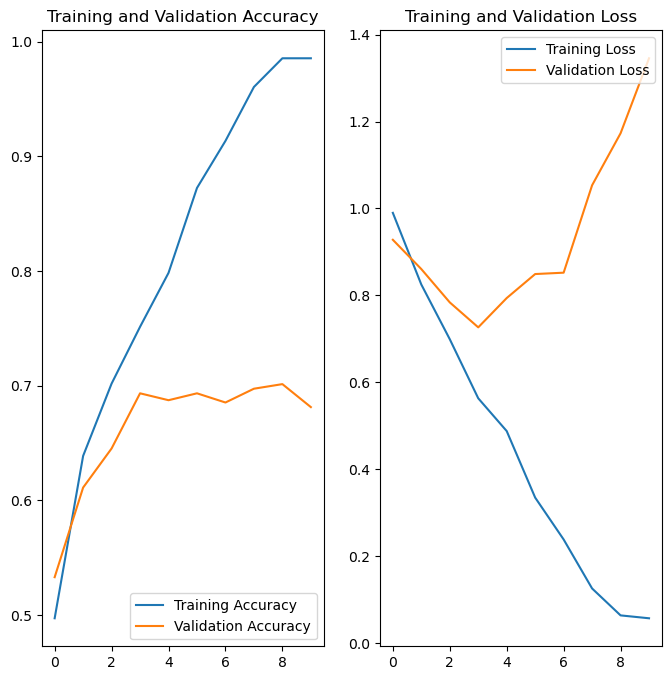

In [28]:
# Visualizing the training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved only around 60% accuracy on the validation set. In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 60% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.

In [29]:
# Data Augmentation 
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

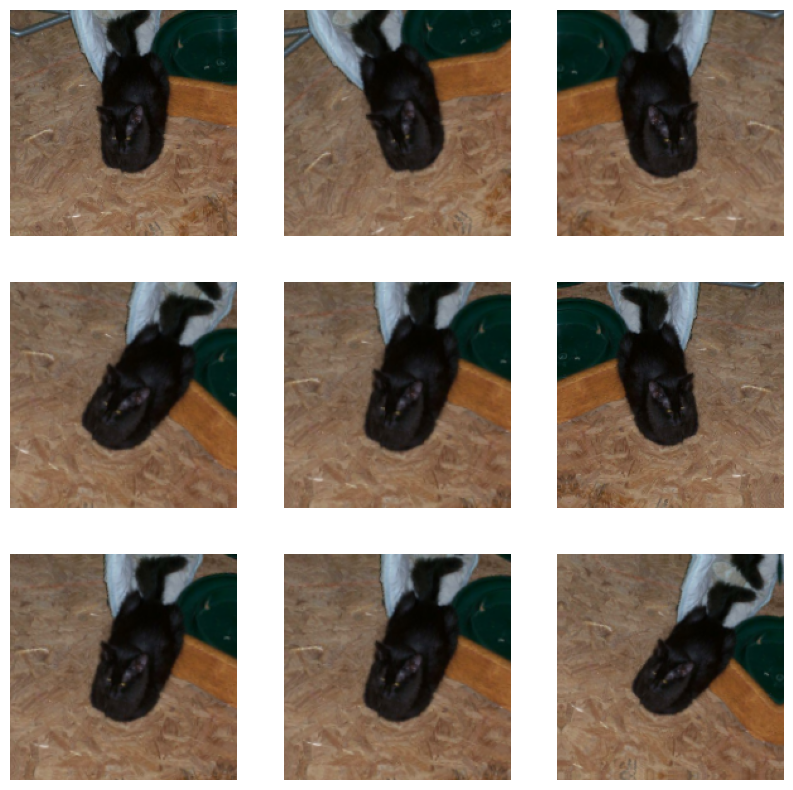

In [31]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [32]:
# Dropout
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [33]:
# Compiling and training the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [36]:
epochs = 15
history = model.fit(train_ds, validation_data=val_ds,epochs=epochs)

Epoch 1/15
63/63 [==============================] - 32s 463ms/step - loss: 1.0790 - accuracy: 0.4572 - val_loss: 0.9164 - val_accuracy: 0.5711
Epoch 2/15
63/63 [==============================] - 30s 472ms/step - loss: 0.9382 - accuracy: 0.5293 - val_loss: 0.9975 - val_accuracy: 0.5210
Epoch 3/15
63/63 [==============================] - 29s 466ms/step - loss: 0.8894 - accuracy: 0.5693 - val_loss: 0.8751 - val_accuracy: 0.5992
Epoch 4/15
63/63 [==============================] - 31s 488ms/step - loss: 0.8658 - accuracy: 0.5873 - val_loss: 0.8989 - val_accuracy: 0.5371
Epoch 5/15
63/63 [==============================] - 32s 513ms/step - loss: 0.8077 - accuracy: 0.6338 - val_loss: 0.8536 - val_accuracy: 0.6112
Epoch 6/15
63/63 [==============================] - 32s 503ms/step - loss: 0.7760 - accuracy: 0.6448 - val_loss: 0.8062 - val_accuracy: 0.6814
Epoch 7/15
63/63 [==============================] - 30s 474ms/step - loss: 0.7442 - accuracy: 0.6668 - val_loss: 0.8655 - val_accuracy: 0.6172

In [48]:
# Load and show an image in pillow
from PIL import Image
import os, os.path

imgs = []
path = "/Users/anshirsa/OneDrive - Capgemini/Documents/IBM Machine Learning/images/test/Lions/lionsss.png"
valid_images = [ ".jpg",".jpeg",".png"]

# Loading the image
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 23ms/step
This image most likely belongs to Lions with a 64.27 percent confidence.
